#**Permutation Feature Importance**

Permutation feature importance is a technique used to evaluate the importance of individual features to the prediction accuracy of a model. It works by randomly shuffling each feature in the dataset and measuring how much the permutation decreases the accuracy of the model. Features that are important for predictions will show a significant decrease in model accuracy when they are permuted, indicating their importance.

Below is an example code snippet that demonstrates how to calculate permutation feature importance on the Iris dataset using a random forest classifier. This example uses sklearn's permutation_importance method.

This code performs the following steps:
- Loads the Iris dataset.
- Splits it into training and testing sets.
- Trains a random forest classifier on the training set.
- Calculates the permutation importance of each feature on the test set.
- Prints the importance of each feature along with its standard deviation across the permutations.

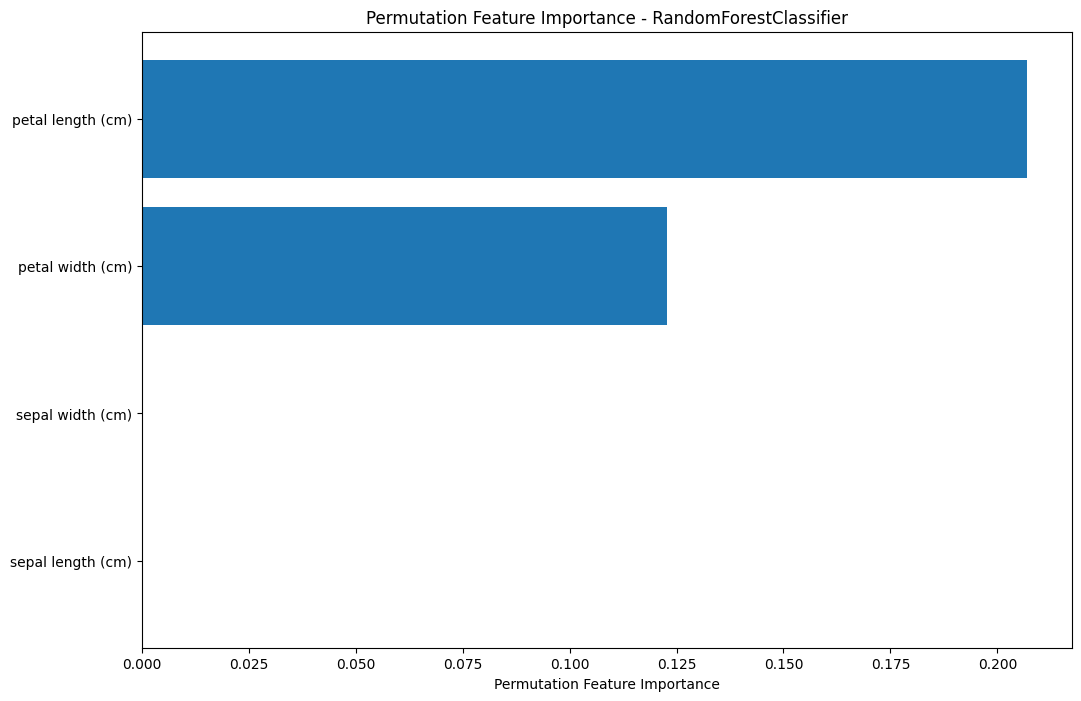

Permutation Feature Importance - RandomForestClassifier


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Compute the permutation feature importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)

# Get sorted feature importances
sorted_idx = perm_importance.importances_mean.argsort()

# Correctly index data.feature_names to match sorted indices
feature_names = [data.feature_names[i] for i in sorted_idx]

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(range(X.shape[1]), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(X.shape[1]), feature_names)
plt.xlabel("Permutation Feature Importance")
plt.title("Permutation Feature Importance - RandomForestClassifier")
plt.show()

print("Permutation Feature Importance - RandomForestClassifier")
plt.show()
